In [4]:
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from metrics import print_regression_metrcis
from sklearn.svm import SVR
# 데이터 불러오기
# df = pd.read_csv("mlb최종.csv", encoding="cp949")


In [54]:
df = pd.read_csv("mlb_retired_total.csv", encoding='ISO-8859-1')

df.columns, df.isna().sum()

df.head()

,name,birth_year,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,retire_year,AVG,OBP,SLG,OPS
0,(Unknown) Scott,1861,13,53,10,12,1,1,1,31,6,2.0,2,37,1884,0.226415,0.254545,0.339623,0.594168
1,(Unknown) Wills,1861,9,36,3,5,3,0,0,31,6,2.0,0,37,1884,0.138889,0.138889,0.222222,0.361111
2,A.J. Ellis,1985,672,1948,194,466,82,3,44,229,2,4.0,280,414,2018,0.239220,0.334829,0.352156,0.686986
3,A.J. Hinch,1975,350,953,104,209,28,3,32,112,13,6.0,71,214,2004,0.219307,0.273438,0.355719,0.629156
4,A.J. Pierzynski,1975,2059,7290,807,2043,407,24,188,909,15,23.0,308,895,2016,0.280247,0.309424,0.420027,0.729451


In [46]:
import chardet

# 파일 경로 지정
file_path = 'mlb+kbo.csv'

# 파일의 앞부분만 읽어서 인코딩 감지
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read(10000))  # 처음 10,000바이트만 확인
    print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [89]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from metrics import print_regression_metrcis

# 데이터 불러오기
df = pd.read_csv("mlb_retired_total.csv", encoding = "ISO-8859-1")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9535 entries, 0 to 9534
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         9535 non-null   object 
 1   birth_year   9535 non-null   int64  
 2   G            9535 non-null   int64  
 3   AB           9535 non-null   int64  
 4   R            9535 non-null   int64  
 5   H            9535 non-null   int64  
 6   2B           9535 non-null   int64  
 7   3B           9535 non-null   int64  
 8   HR           9535 non-null   int64  
 9   RBI          9535 non-null   int64  
 10  SB           9535 non-null   int64  
 11  CS           9535 non-null   float64
 12  BB           9535 non-null   int64  
 13  SO           9535 non-null   int64  
 14  retire_year  9535 non-null   int64  
 15  AVG          9535 non-null   float64
 16  OBP          9535 non-null   float64
 17  SLG          9535 non-null   float64
 18  OPS          9535 non-null   float64
dtypes: flo

In [90]:
# 파생 변수 생성 및 제거

df['retire_age'] = df['retire_year'] - df['birth_year']

df.drop(columns=["name", "birth_year", "retire_year"], inplace=True)

# feature 및 target 설정
X = df.drop(columns=["retire_age"])
y = df['retire_age']

X.head

<bound method NDFrame.head of          G    AB    R     H   2B  3B   HR  RBI   SB    CS   BB   SO       AVG  \
0       13    53   10    12    1   1    1   31    6   2.0    2   37  0.226415   
1        9    36    3     5    3   0    0   31    6   2.0    0   37  0.138889   
2      672  1948  194   466   82   3   44  229    2   4.0  280  414  0.239220   
3      350   953  104   209   28   3   32  112   13   6.0   71  214  0.219307   
4     2059  7290  807  2043  407  24  188  909   15  23.0  308  895  0.280247   
...    ...   ...  ...   ...  ...  ..  ...  ...  ...   ...  ...  ...       ...   
9530  1400  5141  650  1246  230  63   95  471   97  48.0  318  810  0.242365   
9531   228   811  130   243   28  14   14  137    5  18.0  103   77  0.299630   
9532  1124  4084  584  1143  220  55   64  414  176  51.0  319  638  0.279873   
9533    26    46    6     9    1   0    1    2    0   0.0    3   16  0.195652   
9534   298   890  123   211   46   5   26  100   29   8.0   60  186  0.237079  

In [91]:
X.head()

,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,AVG,OBP,SLG,OPS
0,13,53,10,12,1,1,1,31,6,2.0,2,37,0.226415,0.254545,0.339623,0.594168
1,9,36,3,5,3,0,0,31,6,2.0,0,37,0.138889,0.138889,0.222222,0.361111
2,672,1948,194,466,82,3,44,229,2,4.0,280,414,0.239220,0.334829,0.352156,0.686986
3,350,953,104,209,28,3,32,112,13,6.0,71,214,0.219307,0.273438,0.355719,0.629156
4,2059,7290,807,2043,407,24,188,909,15,23.0,308,895,0.280247,0.309424,0.420027,0.729451


In [92]:
X.columns

Index(['G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO',
       'AVG', 'OBP', 'SLG', 'OPS'],
      dtype='object')

In [93]:
# scale_cols = ['G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO']
# exclude_cols =  ['AVG', 'OBP', 'SLG', 'OPS']

# 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:

# scaled_df = pd.DataFrame(X_scaled)

# for col in exclude_cols:
#     scaled_df[col] = df[col].values

# scaled_df.head()

# X_scaled = scaled_df.to_numpy()

In [95]:

# 분할
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 하이퍼파라미터 후보
param_grid = {
    'n_estimators': [100, 200, 300, 700],
    'max_depth': [1, 2, 3, 4, None],
    'learning_rate': [0.001, 0.005, 0.01],
    'subsample': [0.8, 1.0, 1.2, 1.4],
    'colsample_bytree': [0.8, 1.0, 1.2, 1.4]
}

# GridSearchCV 정의
grid_search = GridSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# 학습
grid_search.fit(X_train, y_train)

# 예측
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)

# 평가
print("Best Params:", grid_search.best_params_)
print_regression_metrcis(y_val, y_pred, "최적 XGBoost 모델 성능")

# 지표 저장
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

metrics_result = {
    "Best Params": grid_search.best_params_,
    "MAE": mae,
    "MSE": mse,
    "R2": r2
}

# 결과 정리
results = pd.DataFrame(grid_search.cv_results_)
results['mean_MSE'] = -results['mean_test_score']
results['param_n_estimators'] = results['param_n_estimators'].astype(str)
results['param_max_depth'] = results['param_max_depth'].astype(str)


Fitting 5 folds for each of 960 candidates, totalling 4800 fits


c:\Users\Playdata\miniconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3600 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Playdata\miniconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Playdata\miniconda3\envs\ml\Lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\Playdata\miniconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py", line 1247, in fit
    self._Booster = train

Best Params: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 700, 'subsample': 1.0}
최적 XGBoost 모델 성능
MSE: 37.243568420410156
RMSE: 6.102750778198242
R Squared: -0.4307914972305298


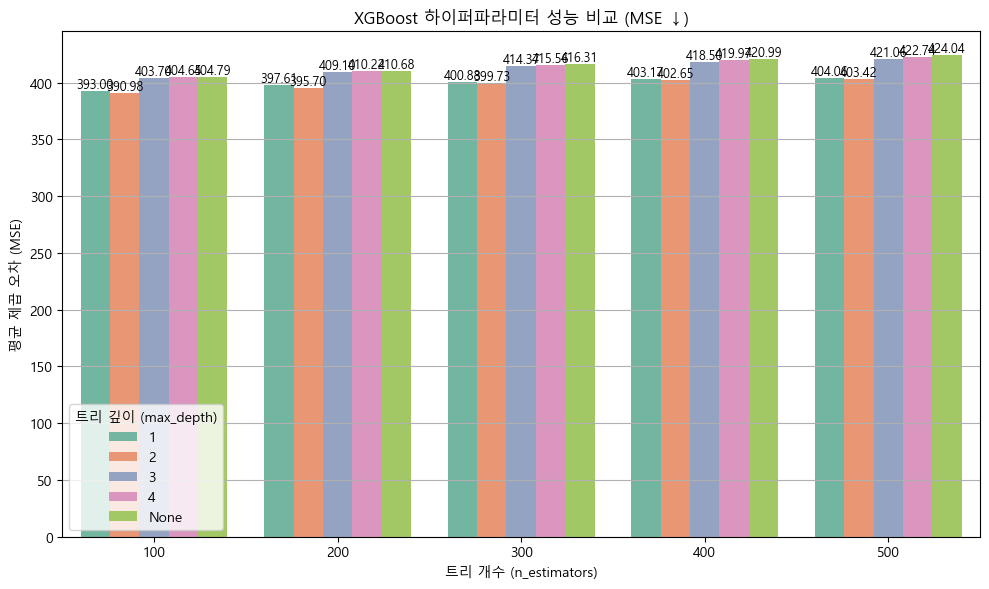

✅ metrics_xgb.csv 저장 완료


In [ ]:
# 시각화
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=results,
    x='param_n_estimators',
    y='mean_MSE',
    hue='param_max_depth',
    palette="Set2",
    errorbar=None
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9)

plt.title("XGBoost 하이퍼파라미터 성능 비교 (MSE ↓)")
plt.ylabel("평균 제곱 오차 (MSE)")
plt.xlabel("트리 개수 (n_estimators)")
plt.legend(title="트리 깊이 (max_depth)")
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("xgb_hyperparameter_mse.png", dpi=300)
plt.tight_layout()
plt.show()

# 저장
# with open("metrics_xgb.pkl", "wb") as f:
#     pickle.dump(metrics_result, f)

df_metrics = pd.DataFrame([metrics_result])
df_metrics.to_csv("metrics_xgb.csv", index=False, encoding='utf-8-sig')
print("✅ metrics_xgb.csv 저장 완료")


In [12]:
df_metrics = pd.DataFrame([metrics_result])  # 한 줄짜리 DataFrame
df_metrics.to_csv("metrics_rf.csv", index=False, encoding='utf-8-sig')
print("✅ metrics_rf.csv 저장 완료")

✅ metrics_rf.csv 저장 완료


In [ ]:
# 피클 불러오기 코드
with open("metrics_rf.pkl", "rb") as f:
    loaded_metrics = pickle.load(f)

# 출력
print("\n📂 저장된 평가 지표 불러오기:")
for key, value in loaded_metrics.items():
    print(f"{key}: {value}")

Note: you may need to restart the kernel to use updated packages.
